<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez21_06052021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network 

Torniamo a parlare del metodo della slide window per vedere perchè non è efficienti.

Vedremo degli algoritmi più efficienti che sono faster CNN e YOLO.

##**ASSICURARSI DI AVERE IL RUNTIME IMPOSTATO SULLA GPU, ALTRIMENTI È TROPPO LENTO**

#ESERCIZIO GALASSIE 

https://github.com/fedhere/MLPNS2021/blob/main/NNDL/CNNgalaxies.ipynb

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


In [4]:
ls

 all_ones_benchmark.zip
 all_zeros_benchmark.zip
 bootcampNB.ipynb
 busBusses.npy
 busTimeTable.npy
 CEDIT_6_5_Friuli_Italy_1976.cpg
 CEDIT_6_5_Friuli_Italy_1976.dbf
 CEDIT_6_5_Friuli_Italy_1976.prj
 CEDIT_6_5_Friuli_Italy_1976.sbn
 CEDIT_6_5_Friuli_Italy_1976.sbx
 CEDIT_6_5_Friuli_Italy_1976.shp
 CEDIT_6_5_Friuli_Italy_1976.shp.xml
 CEDIT_6_5_Friuli_Italy_1976.shx
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true.1'
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true.2'
 central_pixel_benchmark.zip
 country_pop.xls
 demo1.py
 demo2.py
 demo3.py
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson.1
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson.2
 flatiron_building_new_york_city-111.jpg
 galimgs.npy
 grb050525A.csv
 healthcare-dataset-stroke-data.csv
 images_test_rev1.zip
 images_training_rev1/
 images_training_rev1.zip
 inclassNB2016.ipynb
 inclassNB2017.ipynb
 inclassNB2018.ipynb
 ispalindrome.cpython-37.pyc
 ispalindrome.py
 

In [5]:
!chmod 600 kaggle.json

In [6]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key'] 

**RICORDATI DI ACCETTARE LE REGOLE DELLA CHALLENGE**

In [7]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge 

all_zeros_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
training_solutions_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
central_pixel_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
images_test_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
all_ones_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
images_training_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)


Se non riesco a scaricare e leggere da kaggle, vedi: https://github.com/fedhere/MLPNS2021/blob/main/toLoadGalimgsNPY.ipynb

Ho fatto unzip una volta e finchè non cancello i file da drive, posso non fare più unzip.

In [8]:
#!unzip images_training_rev1.zip

In [9]:
#!unzip training_solutions_rev1.zip 

In [57]:
!ls images_training_rev1

Output streaming troncato alle ultime 5000 righe.
178173.jpg  329682.jpg	476954.jpg  626682.jpg	775249.jpg  926425.jpg
178196.jpg  329689.jpg	476981.jpg  626718.jpg	775273.jpg  926426.jpg
178261.jpg  329720.jpg	477003.jpg  626741.jpg	775308.jpg  926435.jpg
178271.jpg  329736.jpg	477013.jpg  626742.jpg	775321.jpg  926446.jpg
178276.jpg  329752.jpg	477016.jpg  626748.jpg	775335.jpg  926448.jpg
178305.jpg  329754.jpg	477023.jpg  626757.jpg	775344.jpg  926453.jpg
178358.jpg  329786.jpg	477039.jpg  626770.jpg	775351.jpg  926462.jpg
178391.jpg  329807.jpg	477057.jpg  626787.jpg	775352.jpg  926478.jpg
178400.jpg  329813.jpg	477058.jpg  626793.jpg	775384.jpg  926480.jpg
178410.jpg  329818.jpg	477077.jpg  626796.jpg	775405.jpg  926484.jpg
178422.jpg  329835.jpg	477087.jpg  626800.jpg	775413.jpg  926488.jpg
178434.jpg  329866.jpg	477103.jpg  626804.jpg	775416.jpg  926509.jpg
178451.jpg  329875.jpg	477132.jpg  626808.jpg	775448.jpg  926522.jpg
178454.jpg  329878.jpg	477139.jpg  626821.jpg	775450.

#I dati di queste galassie sono suddivise in classi. Noi divideremo i dati in 4 classi. Modifichiamo le label probabilistiche per ottenere 4 label che classificano le galassie in:

#spiral

#elliptical

#irregular

#not a galaxy

#E alla fine creeremo da soli una CNN che sia in grado di classificare le galassie.
#**La mia target variable è la classificazione delle galassie**

In [16]:
import pandas as pd
training_labels = pd.read_csv("training_solutions_rev1.csv")

###Utilizziamo il pacchetto cv2 per leggere le immagini

In [17]:
import pylab as pl
import cv2
import numpy as np

Plottiamo un immagine a caso per vedere come sono fatte le immagini

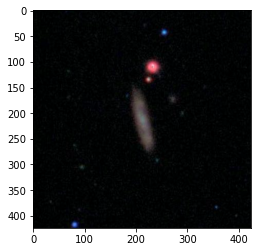

In [18]:
img = np.asarray(cv2.imread("images_training_rev1/313205.jpg"))
pl.imshow(img)

In [19]:
import glob
#glob permette di listare contenuto di folders e directory. Tipo ls ma ls non torna 
#il valore dell'oggetto a python, metre glob si. 

#creo un array di dim 1000 di zeri per leggere 1000 immagini. 
#Leggo le immagini come numpy object per le prime 1000 immagini 
#e poi trasformo ouput come array.
ims = np.zeros([1000, img.shape[0], img.shape[1], img.shape[2]], dtype=np.uint8)
for i,im in enumerate(glob.glob("images_training_rev1/*")[:1000]):
  if i%10 == 0:
    print ("index", i, end="\r", flush=True)  
  ims[i] = np.asarray(cv2.imread(im))

Posso salvare quello che ho letto, così se si dovesse interromepre il kernel posso rileggere i file direttamente in file numerici, anzichp fare di nuovo il for loop. Per creare questo file devo fare

In [20]:
#np.save('filename.npy', ims)

Le immagini sono RGB quindi sono (424,424,3).

**Nel for loop leggo ogni immagine come numpy object, per trasformarle in un array.**

ims è un array di 1000 oggetti, ciascuno di (424,424,3).

In [21]:
ims.shape

(1000, 424, 424, 3)

#**Autoencoders per image recognition**

Abbiamo delle sequential linear neural netwrk. Nelle NN è tipico avere layer che diminuiscono la dimenisonalità delle input feature, fino ad arrivare fino a 2 neuroni o a 1 neuroni nel caso di classificazione binaria.

Tipicamente passiamo da high dimensional input variable ad una low dimenisonal output variable.

**Un autoencoder, invece, ha un architecture con un bottleneck.**

Il l'autoencoder deve predire se stesso, cioè le input e output feature sono la stessa cosa. Questo è utile perchè il bottlneck riduce la dimneisonalità salvando tutto l'infomration content, e dopo se riesco a riprodurre l'input ho vinto perchè ho ridotto la dimenisonalità dell'input e riesco comunque a ricostruire l'input.

Con il bottleneck posso anche pensare di fare clustering, ma ha un costo computazionale elevato farlo sulle immagini.

 

The loss function, and the activation function for the last layer are very important.

#Torniamo a parlare di CNN and YOLO

###Tutti i problemi che riguardano image analysis si usano le CNN e YOLO perché le input features (ovvero i data, ovvero i pixel delle immagini) sono tante. 

Abbiamo due aspetti delle NN: image detection e image recognition. E sono due problemi ben distinti.

Per l'autoencoder che riconosce le handwritten digit parliamo di image recognition.

Quello che faremo noi è creare autoencoder per image recognition. 




###**Per quanto riguarda l'esericzio di trovare la molecola all'interno delle immagini:**

- abbiamo trainato un cNN per imparare la forma della molecola

- il NN si è creato delle feature maps che servono per fare la convoluzione e ricnoscere se nell'immagini c'è o no la molecola imparata prima. **Aabbiamo così risolto il problema dell'image recognition, per immagini di quella specifica size che contengono una molecola**.

- Siccome le immagini che vengono dal microscopio sono molto grandi e contengono diverse molecole, abbiamo creato un NN che cerca su ogni subset dell'immagine grande se c'è la molecola e in base a questo crea una mappa probabilistica delle posizoini della molecola (sliding window).



##**Per l'esercizio sulle galassie in cui abbiamo tantissime immagini, questo metodo è poco efficiente.**

###**Tutti qeusti modelli di image recognition servono per riconoscere se c'è un determinato oggetto in un immagine, ma non sanno cercare cosa ci possa essere in un immagine. Sono 2 problemi diversi.**


Vogliamo passare dal "riconoscere dov'è un oggetto", al "riconoscere che oggetti si trovano all'interno di una imaagine". 

(Quello che diciamo può essere capito meglio se pensiamo alle self driving cars: bisogna riconscere un oggetto, in qualsiasi posizione esso sia e poi bisogna decidere cosa fare).

###Abbiamo due problemi nel cercare cosa ci può essere in un immagine:

1. gli oggetti possono essere ovunque  

2. gli oggetti possono avere una dimensione diversa (scaling problem) in base alla distanza ecc..

Soluzioni: 

#R-CNN:

- si propongono esattamente 2000 regioni di un immagine che hanno una distribuzione di pixel in cui è probabile che ci sia un oggetto.

- usa CNN per estrarre le feature delle 2000 regioni.

- usa un SVM per classificare la preseza o assenza di un oggetto nella regione.

#Fast R-CNN:
 
come prima ma uso CNN per generare feature map e algoritmo per identificare le regioni. Usa una ROI pooling layer.

#Faster R-CNN:

2 NN: uno per region proposal e uno per le predizioni (clasification NN).



**YOLO DEMO**: https://github.com/fedhere/MLPNS2021/blob/main/NNDL/yolodemo.ipynb

I can train YOLO to find galaxy. I have to create label for galaxy, and I can use some tools to do this: such as "labelme" by github.

#Torniamo alle galassie

**Come otteniamo le label dalle immagini delle galassie?**

###**Le LABELS SONO UNA Classificazione probailistica delle galassie**. Siccome sono tante, per fare l'esercizio le collassiamo in sole 4 categorie.

In [22]:
training_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


Quindi creo dei vettori estraendo le training label dalla classe1.3. **Il vettore nga ci da le probabilità che un oggetto non sia una galassia.**

E analogamente per gli altri tipi di classi.

Spi è un dataframe invece. E ho deciso che la probabilità che sia a spirale è il max della probabilità di tutte le probabilità disponibili per le spirali di tipo A, B, ecc.



In [23]:
#probability that it is not a galaxy
nga = training_labels["Class1.3"]
#probab that it is spiral
spi = training_labels[["Class5.1", "Class5.2", "Class5.3", "Class5.4"]].max(axis=1)
#probab that it is elliptical
ell = training_labels["Class6.2"]
irr = training_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].max(axis=1)
training_labels2 = pd.DataFrame({"nga": nga, "spi":spi, "ell":ell, "irr":irr})

In [24]:
training_labels2

,nga,spi,ell,irr
0,0.000000,0.512101,0.945547,0.027226
1,0.009222,0.236781,0.810851,0.140353
2,0.056931,0.117790,1.000000,0.000000
3,0.068059,0.125280,0.679602,0.128159
4,0.066161,0.000000,0.970617,0.029383
...,...,...,...,...
61573,0.000000,0.260804,0.754266,0.175454
61574,0.000000,0.053406,0.872356,0.062095
61575,0.019783,0.347328,0.160814,0.604214
61576,0.000000,0.545764,0.136000,0.500256


They're still probabilistic and I want to simplify this problem:

#VOGLIO AVERE UN CLASSIFIER CON 4 CLASSI

**Allora creo una TARGET VARIABLE che contiene 0,1,2,3 basato sul valore più alto tra le tipologie che ho creato**

In [25]:
newclass = [np.where(training_labels2.iloc[i] == np.max(training_labels2.iloc[i]))[0][0]
            for i in range(len(training_labels2))]

"for every index that goes from 0 to len(dataframe), take that row and where that row take its maxmum value, save that index".

In [26]:
newclass

[2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,


#**split a 1000 galaxies dataset into train-test with a proportion of 2-1. Note that 1000 object is a critically small dataset for DNN!**

#RICORDA DI NORMALIZZARE LE IMMAGINI (L'HO FATTO DIVIDENDO PER 255.0)

#HO CAMPIONATO LE IMMAGINI PER FARLE DIVENTAER PIÙ PICCOLE ALTRIMENTI LA NN MI FA ANDARE OUT OF MEMRY SUL NOTEBOOK

Se utlizzo il campionamento delle immagini che ho commentato, mi da dei problemi più avanti. Bisogna aggiustare

In [27]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(ims[:,::2,::2,:]/255.0, np.array(newclass[:1000]), 
#                                                    test_size=0.33, random_state=42)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ims, np.array(newclass[:1000]), test_size=0.33, random_state=42)

In [29]:
X_train.shape[0]

670

In [33]:
X_train.shape

(670, 424, 424, 3)

In [34]:
ims.shape[1]

424

##**NON HO BISOGNO DI FARE IL RESHAPE PER PORTARE L'IMMAGINE COME UN VETTORE DI 1 RIGA,  PERCHÈ STIAMO FACENDO 2D IMAGE RECOGNITION**

Questo tipo di reshape l'avevamo fatto nell'autoencoder perchè non usavamo convolutional layer, e il NN non lavora su dimensioni multiple, ma lavorava solo su una dimensione. Il convolutional 2D cerca forme 2D nell'iimagine e quindi va bene lasciare l'immagine in "2D".

Se voglio fare il reshae su una riga faccio

reshape(n_imm, image_rows, image_cols, n_layers)

**Le immagini sono 3D perchè sono RGB, e allora perchè facciamo convolutional 2D?**

Le mappe convoluzonali sono indipendenti sui 3 canali dei colori, e poi sono messe insieme tipo average. Ogni neurone impara 3 mappe indipendenti per i 3 canali e poi mette insieme la feature map con average. 


In [31]:
#X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
#X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
#input_shape = (img_rows, img_cols, 1)

In [35]:
batch_size = 128
num_classes = 4
epochs = 50
input_shape = ims[0].shape

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [38]:
from keras.optimizers import Adam

# Set Optimizer
opt = Adam(lr=0.001, decay=1e-6)

**Adesso devo creare la mia rete neurale inserendo i layer di cui ho bisogno**

###**Dopo ogni convolutoinal layer aggiungiamo un maxpool layer. Raccoglie l'informaizone sulla feature map riducendo la dimenisonalità. In pratica riduce il rumore nella correlation**

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(10,10), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [40]:
model.compile(optimizer=opt, loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')
#metric mi dice quali metriche voglio salvare, e serve per fare il plot

In [41]:
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [42]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback, EarlyStopping

patience = EarlyStopping(patience=5)
filepath = "galcheckpoints/cnn-improvement-{epoch:02d}-{loss:.4f}.hd5" 
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')

In [43]:
patience

In [47]:
#QUANDO RUN QUESTO PEZZO MI MANDA OUT OF MEMORY
#history = model.fit(X_train, y_train, epochs=20,
#                    validation_split=0.2,
#                    batch_size=128, verbose=1,
#                    callbacks=[patience])#, [checkpoint])


In [48]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
21/21 [==============================] - 19s 662ms/step - loss: 109.3006 - accuracy: 0.7433
Epoch 2/20
21/21 [==============================] - 9s 442ms/step - loss: 1.0357 - accuracy: 0.8716
Epoch 3/20
21/21 [==============================] - 9s 445ms/step - loss: 0.5573 - accuracy: 0.8776
Epoch 4/20
21/21 [==============================] - 9s 446ms/step - loss: 0.5298 - accuracy: 0.8791
Epoch 5/20
21/21 [==============================] - 9s 448ms/step - loss: 0.5103 - accuracy: 0.8791
Epoch 6/20
21/21 [==============================] - 9s 451ms/step - loss: 0.4985 - accuracy: 0.8791
Epoch 7/20
21/21 [==============================] - 10s 453ms/step - loss: 0.4913 - accuracy: 0.8791
Epoch 8/20
21/21 [==============================] - 10s 454ms/step - loss: 0.5184 - accuracy: 0.8791
Epoch 9/20
21/21 [==============================] - 10s 456ms/step - loss: 0.4812 - accuracy: 0.8791
Epoch 10/20
21/21 [==============================] - 10s 458ms/step - loss: 0.5175 - accuracy:

In [49]:
test_loss, test_acc = model.evaluate(X_test, y_test)

11/11 [==============================] - 2s 222ms/step - loss: 0.4148 - accuracy: 0.9152


In [50]:
score=model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 108ms/step - loss: 0.4148 - accuracy: 0.9152


In [51]:
score

[0.41481757164001465, 0.9151515364646912]

In [52]:
from scipy import ndimage, misc
newimg = np.zeros([1000*5, img.shape[0], img.shape[1], img.shape[2]], 
                  dtype=np.uint8)
np.random.seed(123)
for i in range(len(ims)):
  angles = np.random.rand(4) *   180
  newimg[i*5] = ims[i].copy()
  for j,a in enumerate(angles):

    newimg[i*5+1+j] = ndimage.rotate(newimg[i*5], a, 
                                         reshape=False, mode='mirror')

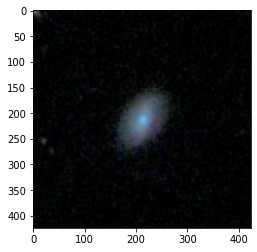

In [53]:
pl.imshow(ims[0])

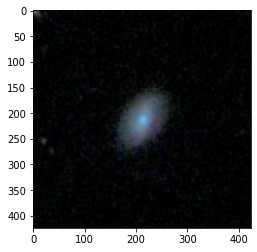

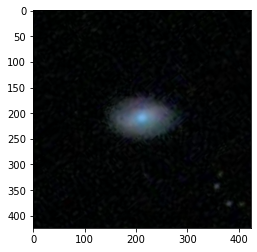

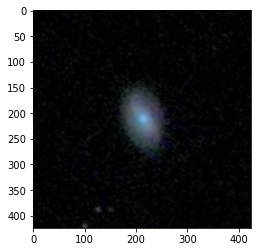

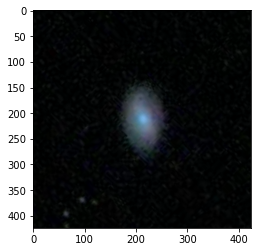

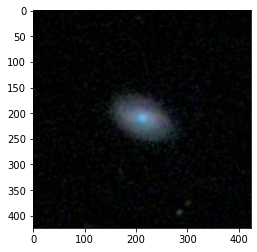

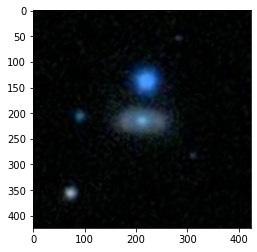

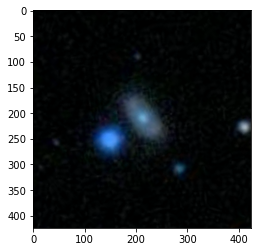

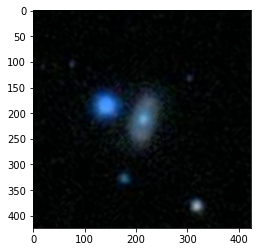

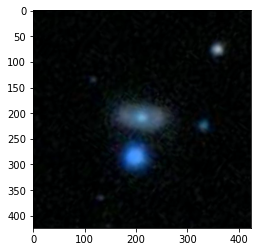

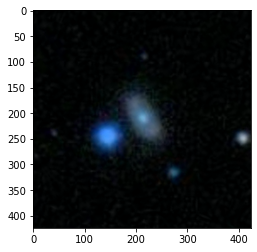

In [54]:
for i in range (10):
  pl.imshow(newimg[i])
  pl.show()

in a look like the one above, take each image and rotate if by a random angle, but also change its contrast by a random amount. see the example below. choose small contrast changes if you want your images to remain realistic

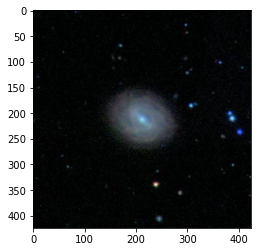

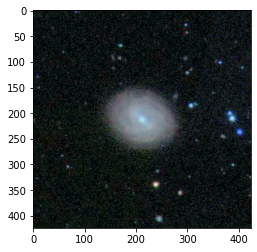

In [55]:
fig = pl.figure()
# a power < 1 (here 0.2) lowers the contrast
imgnew = ims[10].astype(float)**0.6

#normalize: reset range to 0-255
imgnew *= 255 / imgnew.max()
imgnew = imgnew.astype(np.uint8)

pl.imshow(ims[10])

fig = pl.figure()
pl.imshow(imgnew)